# Load Dataset

<AxesSubplot:title={'center':'Airline Passengers Over Time'}, xlabel='Period'>

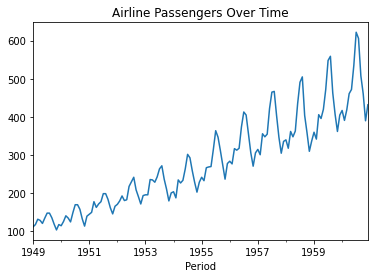

In [1]:
from sktime.datasets import load_airline

y = load_airline()

y.plot(title='Airline Passengers Over Time')

# Split y into Train and Test Groups

In [2]:
from sktime.forecasting.all import temporal_train_test_split

In [3]:
y_train, y_test = temporal_train_test_split(y)

In [4]:
y_train.index.min(), y_train.index.max()

(Period('1949-01', 'M'), Period('1957-12', 'M'))

In [5]:
y_test.index.min(), y_test.index.max()

(Period('1958-01', 'M'), Period('1960-12', 'M'))

# ARIMA

In [6]:
from sktime.forecasting.arima import ARIMA

Add a difference with the middle parameter

In [7]:
arima_model = ARIMA(order=(1,1,1))
arima_model.fit(y_train)
fh = list(range(1, 1+len(y_test)))
y_pred = arima_model.predict(fh=fh )

Plot the results where blue is actual and the red is your prediction

In [13]:
y_train


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Name: Number of airline passengers, Length: 108, dtype: float64

In [9]:
y_test

Period
1958-01    340.0
1958-02    318.0
1958-03    362.0
1958-04    348.0
1958-05    363.0
1958-06    435.0
1958-07    491.0
1958-08    505.0
1958-09    404.0
1958-10    359.0
1958-11    310.0
1958-12    337.0
1959-01    360.0
1959-02    342.0
1959-03    406.0
1959-04    396.0
1959-05    420.0
1959-06    472.0
1959-07    548.0
1959-08    559.0
1959-09    463.0
1959-10    407.0
1959-11    362.0
1959-12    405.0
1960-01    417.0
1960-02    391.0
1960-03    419.0
1960-04    461.0
1960-05    472.0
1960-06    535.0
1960-07    622.0
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [10]:
y_pred

1958-01    360.379434
1958-02    351.748628
1958-03    359.342542
1958-04    358.961914
1958-05    362.500819
1958-06    364.113251
1958-07    366.672556
1958-08    368.766467
1958-09    371.089122
1958-10    373.299348
1958-11    375.564833
1958-12    377.803158
1959-01    380.054833
1959-02    382.299946
1959-03    384.548284
1959-04    386.795037
1959-05    389.042569
1959-06    391.289718
1959-07    393.537055
1959-08    395.784300
1959-09    398.031591
1959-10    400.278859
1959-11    402.526138
1959-12    404.773411
1960-01    407.020688
1960-02    409.267962
1960-03    411.515238
1960-04    413.762513
1960-05    416.009789
1960-06    418.257064
1960-07    420.504339
1960-08    422.751615
1960-09    424.998890
1960-10    427.246165
1960-11    429.493441
1960-12    431.740716
Freq: M, dtype: float64

<AxesSubplot:xlabel='Period'>

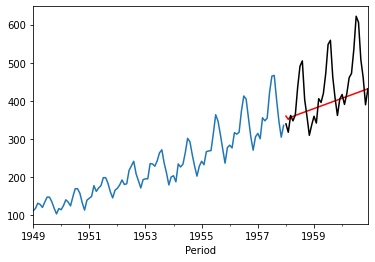

In [8]:
y_train.plot()
y_pred.plot(color='red')
y_test.plot(color = 'black')

# Evaluate yhat

In [9]:
from sktime.performance_metrics.forecasting import smape_loss

In [10]:
smape_loss(y_test, y_pred )

0.12542904291143506